In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob
from sklearn import linear_model

In [23]:
"""
# raw files
paths = ["DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/", "DataForValidatingModels/Eugene/"]
files = sum([glob.glob(path + "*.csv") for path in paths], [])

#loop over them and create df for each csv
for file in files:
    with open(file, "r") as f:
        f.readline() # skip line
        f.readline() # skip line
        lines = f.readlines()

    with open("cleaned/" + file, "w") as f:
        header = lines[0].split(",")
        f.write(",".join(header) + "\n") # write header
        for line in lines[1:]:
            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns
cleaned_files = ["cleaned/" + file for file in files]
"""

In [55]:

# create master csv
counts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []
for file in cleaned_files:
    df = pd.read_csv(file)
    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split("T")[0])
    df["Time Stamp Hour"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split(":")[0])
    df["Time Stamp Hour"] = df["Time Stamp Hour"].str.replace('T', '')
    df_filtered = df.groupby(["Time Stamp Hour"], as_index=False).first()
    #df_filtered = df
    site = file.split("/")[2]
    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]
    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):
        df_filtered["Cleaned"] = 1
    else:
        df_filtered["Cleaned"] = 0
    counts[site] += 1
    dfs.append(df_filtered)
df = pd.concat(dfs)
#df.to_csv("solar-panels.csv")
df.to_csv("solar-panels-all.csv")


In [56]:
# read data
#df = pd.read_csv("solar-panels.csv")
df = pd.read_csv("solar-panels-all.csv")
del df["Unnamed: 0"]
df[df["Site"] == "Cocoa"].sort_values(by = ["Time Stamp Hour"]).head(50)


,Time Stamp Hour,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),Pmp uncertainty (%),...,Solar QA residual (W/m2) = Direct*cos(zenith) + Diffuse Horiz. Global Horiz,PV module soiling derate,Daily maintenance start time (hour: minute) - no maintenance that day = 99:99,Daily maintenance end time (hour: minute) - no maintenance that day = 99:99,Precipitation prior to daily maintenance (mm) accumulated daily total,Number of I-V curve data pairs (n),Time Stamp,Site,Site Index,Cleaned
0,2011-01-2108,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,0.7,1.0,10:48,10:54,24.7,187,2011-01-21,Cocoa,0,0
24280,2011-01-2108,2011-01-21T08:15:10,35.2,10.6,19.0,1.9,0.0901,5.6,1.7856,5.6,...,0.7,1.0,10:48,10:54,24.7,182,2011-01-21,Cocoa,6,0
40211,2011-01-2108,2011-01-21T08:15:05,35.1,10.7,19.0,1.9,0.1806,4.2,2.1674,4.2,...,0.7,1.0,10:48,10:54,24.7,183,2011-01-21,Cocoa,10,0
4112,2011-01-2108,2011-01-21T08:15:01,34.9,10.7,19.0,1.9,0.0979,2.6,1.1265,2.7,...,0.7,1.0,10:48,10:54,24.7,186,2011-01-21,Cocoa,1,0
12045,2011-01-2108,2011-01-21T08:10:26,20.2,17.8,19.3,1.9,0.0189,12.8,1.9610,12.8,...,0.4,1.0,10:48,10:54,24.7,182,2011-01-21,Cocoa,3,0
32486,2011-01-2108,2011-01-21T08:15:06,35.1,10.7,19.0,1.9,0.1929,3.9,2.4444,4.0,...,0.7,1.0,10:48,10:54,24.7,184,2011-01-21,Cocoa,8,0
36565,2011-01-2108,2011-01-21T08:15:13,35.4,10.6,19.0,1.9,0.2333,0.6,1.4124,0.6,...,0.7,1.0,10:48,10:54,24.7,186,2011-01-21,Cocoa,9,0
7943,2011-01-2108,2011-01-21T08:15:12,35.3,10.6,18.9,1.9,0.1867,0.7,2.5091,0.7,...,0.7,1.0,10:48,10:54,24.7,183,2011-01-21,Cocoa,2,0
16141,2011-01-2108,2011-01-21T08:15:15,35.5,10.6,19.7,1.9,0.2000,0.6,6.9664,0.8,...,0.7,1.0,10:48,10:54,24.7,185,2011-01-21,Cocoa,4,0
28371,2011-01-2108,2011-01-21T08:15:19,35.6,10.6,19.4,1.9,0.0422,5.9,1.2563,5.9,...,0.7,1.0,10:48,10:54,24.7,185,2011-01-21,Cocoa,7,0


In [57]:
#df_weather = pd.read_csv("weather-data.csv")
df_weather = pd.read_csv("weather-data-hourly.csv")
#df_weather["Time Stamp"] = df_weather["date_time"]
df_weather["Time Stamp Hour"] = df_weather["date_time"].apply(lambda x : x.split(":")[0])
zip_dict = {32922: "Cocoa", 97401: "Eugene", 80401: "Golden"}
df_weather["Site"] = df_weather["location"].apply(lambda x : zip_dict[x])
del df_weather["location"]; del df_weather["Unnamed: 0"]
df_weather.head(50)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Time Stamp Hour,Site
0,2011-01-21 00:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,39,94,0.0,1012,20,10,208,15,2011-01-21 00,Cocoa
1,2011-01-21 01:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,40,94,0.0,1011,20,10,215,18,2011-01-21 01,Cocoa
2,2011-01-21 02:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,40,93,0.7,1011,20,10,223,20,2011-01-21 02,Cocoa
3,2011-01-21 03:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,40,93,0.9,1010,20,10,231,23,2011-01-21 03,Cocoa
4,2011-01-21 04:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,48,93,0.5,1010,19,10,239,20,2011-01-21 04,Cocoa
5,2011-01-21 05:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,56,93,0.0,1011,19,10,247,16,2011-01-21 05,Cocoa
6,2011-01-21 06:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,65,93,0.0,1011,19,10,255,13,2011-01-21 06,Cocoa
7,2011-01-21 07:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,67,92,0.0,1011,19,10,269,12,2011-01-21 07,Cocoa
8,2011-01-21 08:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,68,92,0.4,1011,19,10,283,12,2011-01-21 08,Cocoa
9,2011-01-21 09:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,70,91,0.5,1011,19,10,297,11,2011-01-21 09,Cocoa


In [60]:
#df_master = df.merge(df_weather, how="left",left_on=["Time Stamp", "Site"], right_on=["Time Stamp", "Site"])
df_master = df.merge(df_weather, how="left",left_on=["Time Stamp Hour", "Site"], right_on=["Time Stamp Hour", "Site"])
#print(df_master[(df_master["WindChillC"].isnull()) & (df_master["Site"] == "Golden")][["Site", "Time Stamp"]].min())
#print(df_master[(df_master["WindChillC"].isnull()) & (df_master["Site"] == "Golden")][["Site", "Time Stamp"]].max())
df_master
#df_master.columns
#df_master.isnull().values.any()

,Time Stamp Hour,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),Pmp uncertainty (%),...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2011-01-2108,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-2109,2011-01-21T09:10:03,29.3,12.1,18.9,1.9,0.0863,2.9,0.9709,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-2110,2011-01-21T10:00:03,58.3,6.3,18.2,1.9,0.1769,1.5,2.2825,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-2111,2011-01-21T11:00:03,202.6,2.4,23.4,1.9,0.5552,0.6,8.3039,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-2112,2011-01-21T12:00:03,174.1,2.7,23.2,1.9,0.5012,0.6,7.4126,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132012,2014-01-2012,2014-01-20T12:00:04,77.6,4.9,5.6,1.9,0.3798,2.5,5.5136,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132013,2014-01-2013,2014-01-20T13:00:04,107.0,3.7,5.7,1.9,0.5245,1.9,7.9213,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132014,2014-01-2014,2014-01-20T14:00:04,88.7,4.4,6.1,1.9,0.4257,2.3,6.2504,2.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132015,2014-01-2015,2014-01-20T15:00:04,87.4,4.4,6.3,1.9,0.4213,2.3,6.1781,2.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# filter data
df2 = df_master[df_master["Relative humidity (%RH)"] != -9999]
df3 = df2[df2["POA irradiance CMP22 pyranometer (W/m2)"] <= 1000]

In [10]:
df_cleaned = df3[df3["Cleaned"] == 1]
df_dirty = df3[df3["Cleaned"] == 0]

In [9]:
df_dirty["Year-Month"] = df_dirty["Time Stamp"].apply(lambda x : x.split("-")[0] + "-" + x.split("-")[1])
df_delta = df_dirty.groupby(["Year-Month"], as_index=False).first()
df_delta["Soiling Change"] = df_dirty.groupby(["Year-Month"], as_index=False).min()["PV module soiling derate"] - df_dirty.groupby(["Year-Month"], as_index=False).max()["PV module soiling derate"]

/Users/edwardxiong/opt/miniconda3/envs/pv-ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Soiling Degradation vs Humidity')

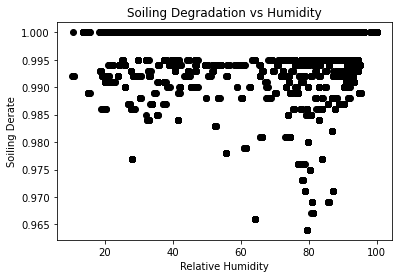

In [10]:
plt.scatter(df3["Relative humidity (%RH)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Relative Humidity"); plt.ylabel("Soiling Derate")
plt.title("Soiling Degradation vs Humidity")

Text(0.5, 1.0, 'Back Temperature Effect on Soiling Degradation')

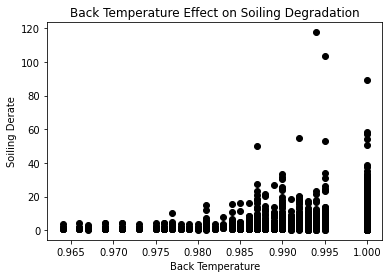

In [11]:
plt.scatter(df3["PV module soiling derate"], df3["Pmp (W)"], color="black") 
plt.xlabel("Back Temperature"); plt.ylabel("Soiling Derate")
plt.title("Back Temperature Effect on Soiling Degradation")

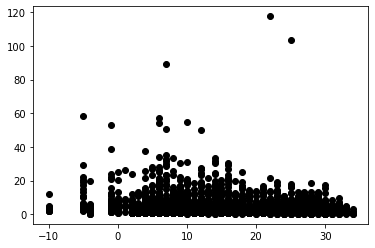

In [12]:
plt.scatter(df3["tempC"], df3["Pmp (W)"], color = "black")

count    11286.000000
mean      -901.523755
std       2980.774222
min      -9999.000000
25%         51.100000
50%         82.000000
75%         89.700000
max        100.000000
Name: Relative humidity (%RH), dtype: float64
count    10191.000000
mean        74.991404
std         21.240660
min         10.300000
25%         68.650000
50%         83.800000
75%         90.200000
max        100.000000
Name: Relative humidity (%RH), dtype: float64


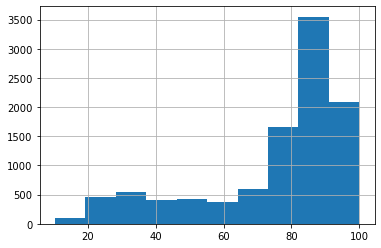

In [13]:
print(df["Relative humidity (%RH)"].describe())
print(df3["Relative humidity (%RH)"].describe())
df3["Relative humidity (%RH)"].hist()

count    11286.000000
mean        12.598627
std          7.848526
min        -18.900000
25%          7.100000
50%         13.000000
75%         18.500000
max         47.700000
Name: PV module back surface temperature (degC), dtype: float64
count    10191.000000
mean        12.604955
std          7.824769
min        -18.900000
25%          7.000000
50%         12.800000
75%         18.600000
max         40.900000
Name: PV module back surface temperature (degC), dtype: float64


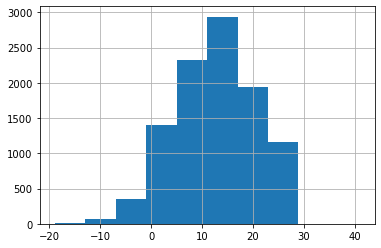

In [14]:
print(df["PV module back surface temperature (degC)"].describe())
print(df3["PV module back surface temperature (degC)"].describe())
df3["PV module back surface temperature (degC)"].hist()

count    11286.000000
mean         0.997620
std          0.004866
min          0.964000
25%          0.995000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64
count    10191.000000
mean         0.997752
std          0.004876
min          0.964000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64


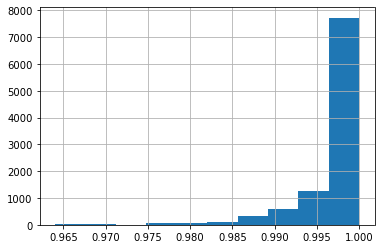

In [15]:
print(df["PV module soiling derate"].describe())
print(df3["PV module soiling derate"].describe())
df3["PV module soiling derate"].hist()

count    11286.000000
mean        44.487852
std         39.186134
min         20.000000
25%         22.800000
50%         27.200000
75%         57.600000
max       1100.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64
count    10191.000000
mean        41.714366
std         37.622769
min         20.000000
25%         22.500000
50%         25.900000
75%         53.500000
max        849.400000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64


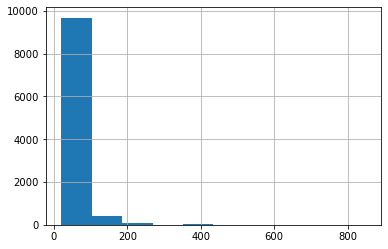

In [16]:
print(df["POA irradiance CMP22 pyranometer (W/m2)"].describe())
print(df3["POA irradiance CMP22 pyranometer (W/m2)"].describe())
df3["POA irradiance CMP22 pyranometer (W/m2)"].hist()

In [15]:
# create basic regression model
x_vars = ["humidity", "Direct normal irradiance (W/m2)", "PV module back surface temperature (degC)", 
          "tempC", "windspeedKmph", "POA irradiance CMP22 pyranometer (W/m2)", "sunHour", "cloudcover", 
          "precipMM", "winddirDegree", "Global horizontal irradiance (W/m2)", "Diffuse horizontal irradiance (W/m2)",
          "totalSnow_cm"]
y_var = ["Pmp (W)"]

In [14]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_dirty.loc[:, x_vars], df_dirty.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_dirty.loc[:, x_vars])
print("mean y val", np.mean(df_dirty.loc[:, y_var]))
print("mean absolute error", sklearn.metrics.mean_absolute_error(pred, df_dirty.loc[:, y_var]))
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_dirty.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(df_dirty.loc[:, y_var], pred))
print("coefficients", simple_reg.coef_)

mean y val Pmp (W)    29.189818
dtype: float64
mean absolute error 12.502383447438822
mean squared error 484.87923348843
R2 score 0.5682956094494469
coefficients [[-0.00401282 -0.00165244 -0.06154475  0.00483309  0.04615857  0.09086033
  -0.03019195  0.00357939  0.05228354 -0.00061929 -0.00680946  0.00405513
   0.3225683 ]]


In [16]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_cleaned.loc[:, x_vars], df_cleaned.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_cleaned.loc[:, x_vars])
print("mean y val", np.mean(df_cleaned.loc[:, y_var]))
print("mean absolute error", sklearn.metrics.mean_absolute_error(pred, df_cleaned.loc[:, y_var]))
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_cleaned.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(pred, df_cleaned.loc[:, y_var]))
print("coefficients", simple_reg.coef_)


mean y val Pmp (W)    16.877989
dtype: float64
mean absolute error 0.4297152370516598
mean squared error 0.3201156353573184
R2 score 0.9978568598739582
coefficients [[ 0.0024943  -0.000846   -0.04301783  0.0033223  -0.00056255  0.04766082
   0.08211884  0.00884702  0.04854169  0.00116246 -0.0049149   0.00241824
  -0.07699798]]
